In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import csv file
df = pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")

# DATA CLEANING

In [7]:
df.shape

(11251, 15)

df.head(10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [12]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.shape

(11251, 13)

In [16]:
# drop null values
df.dropna(inplace=True)

In [19]:
df.shape

(11239, 13)

In [20]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [21]:
df['Amount'].dtypes

dtype('int64')

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [26]:
#rename column
df.rename(columns={'Marital_Status':'Married_Status'},inplace=True)

In [27]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [28]:
df.describe()

,User_ID,Age,Married_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## GENDER

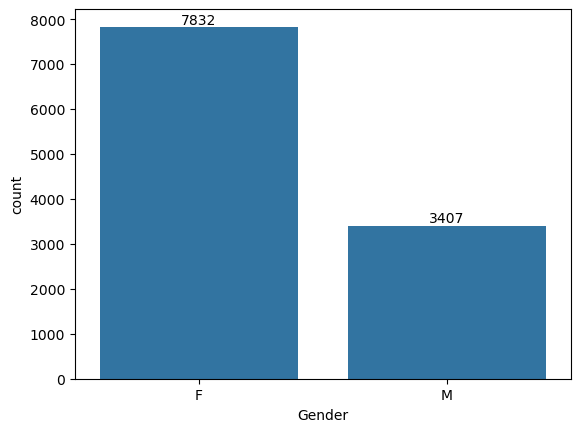

In [38]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars,label_type='edge')

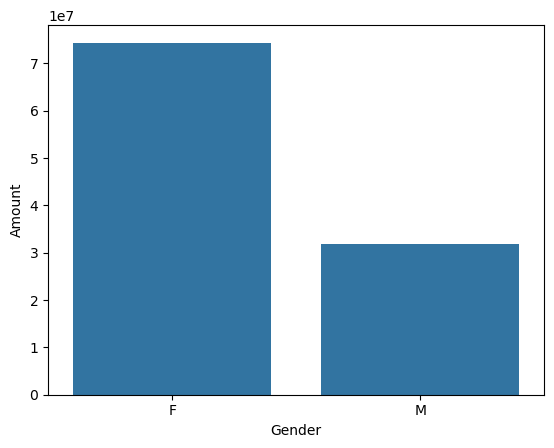

In [45]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(x='Gender',y='Amount',data=sales_gen)


## AGE 

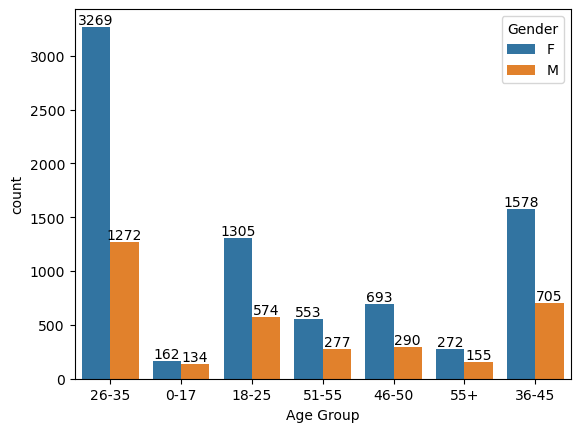

In [46]:
ax = sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

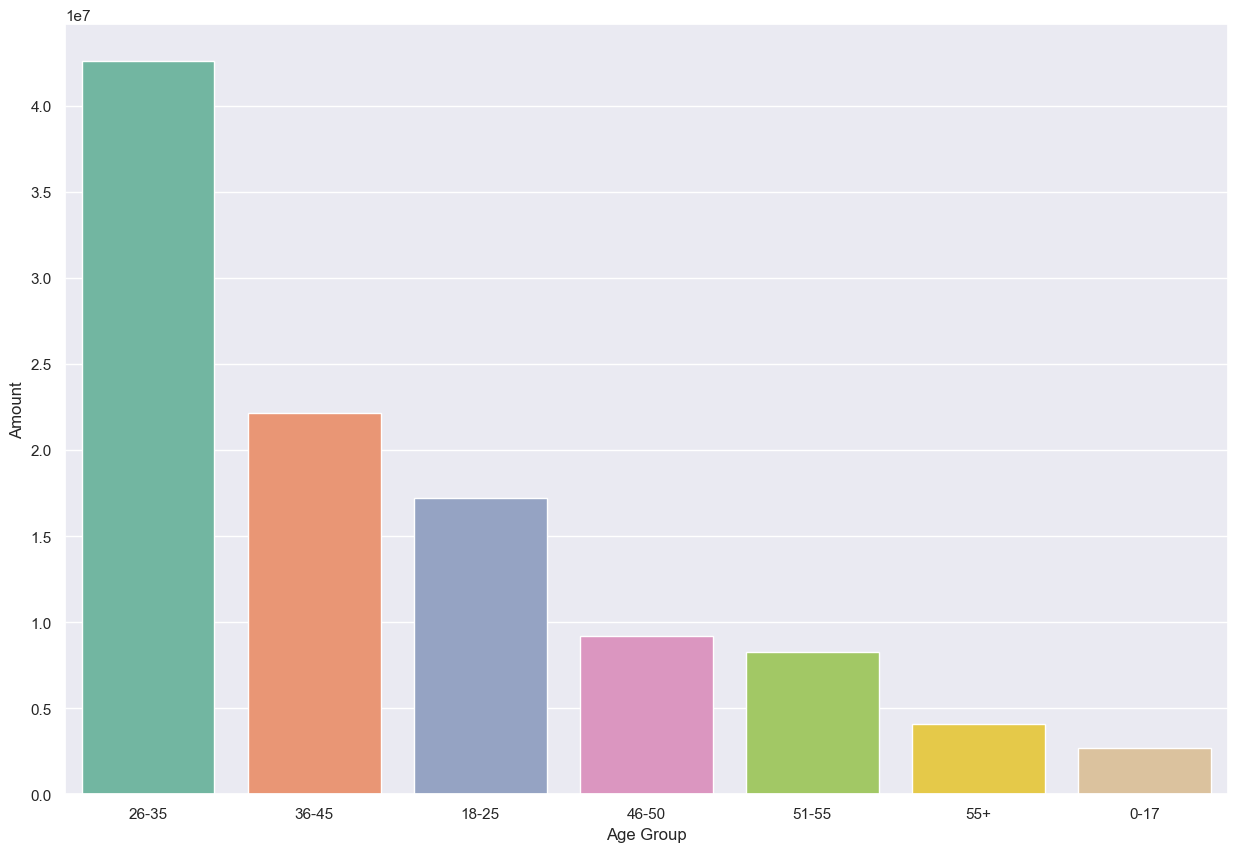

In [69]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,hue='Age Group',legend=False,palette='Set2')

## STATE

<Axes: xlabel='State', ylabel='Orders'>

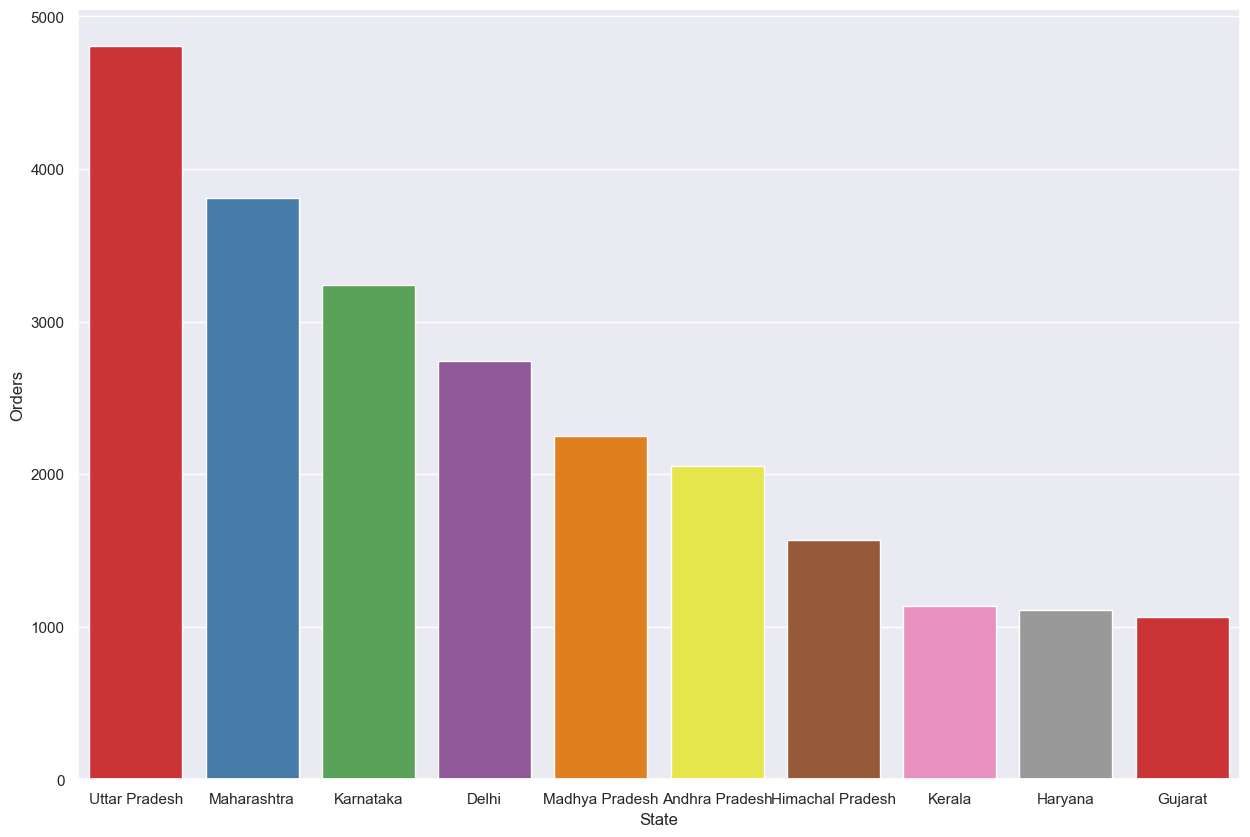

In [72]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State',y='Orders',data=sales_state,hue='State',legend=False,palette='Set1')

<Axes: xlabel='State', ylabel='Amount'>

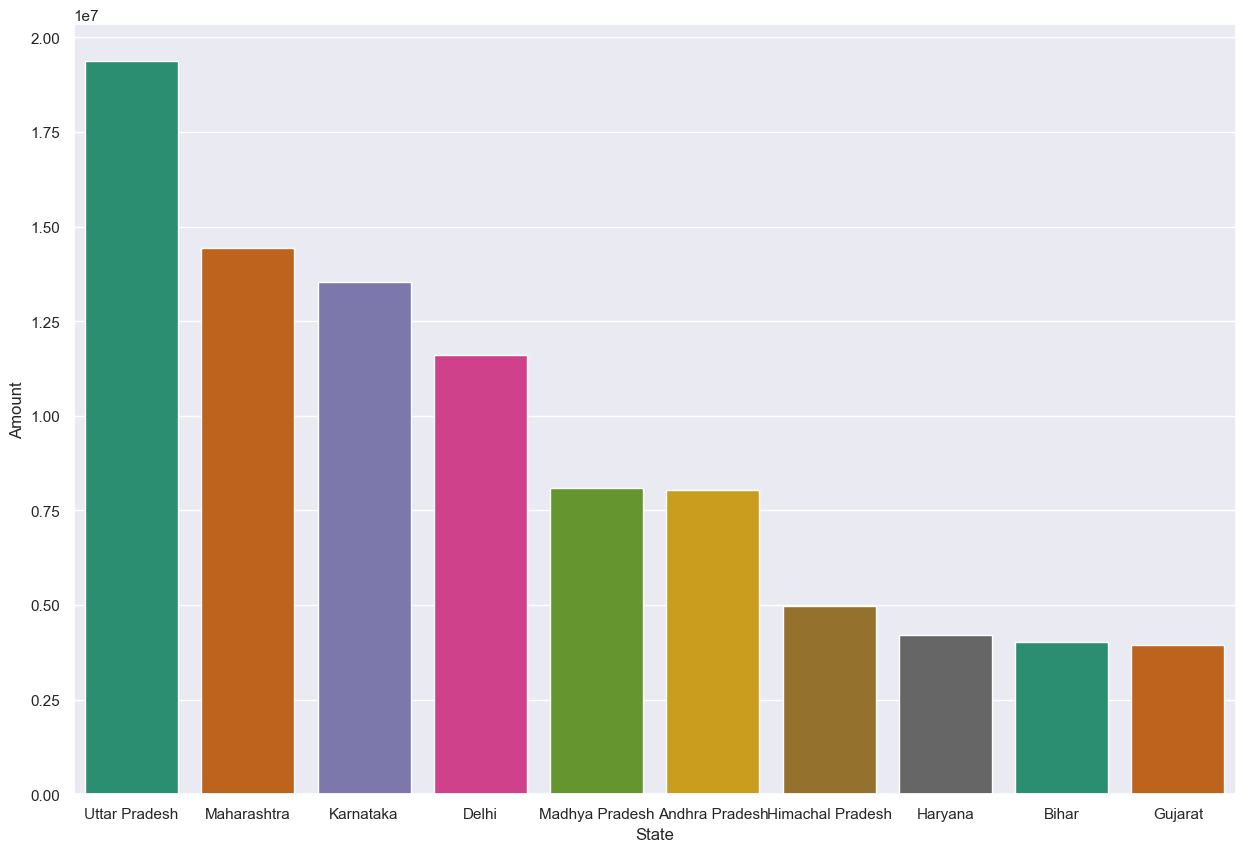

In [79]:
# total amount/sales from top 10 states
sales_state = df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State',y='Amount',data=sales_state,hue='State',palette='Dark2')

## MARRIED STATUS

In [83]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

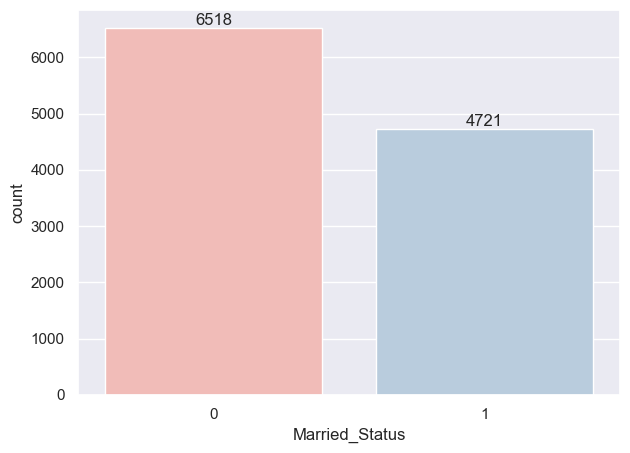

In [91]:
# count for married and unmarried 
ax = sns.countplot(data=df,x='Married_Status',hue='Married_Status',legend=False,palette='Pastel1')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married_Status', ylabel='Amount'>

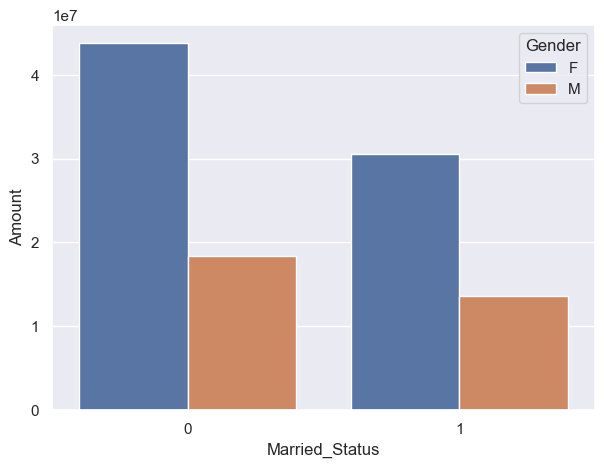

In [95]:
# count of who spend more 
sales_married = df.groupby(['Married_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data=sales_married,x='Married_Status',y='Amount',hue='Gender')


## OCCUPATION

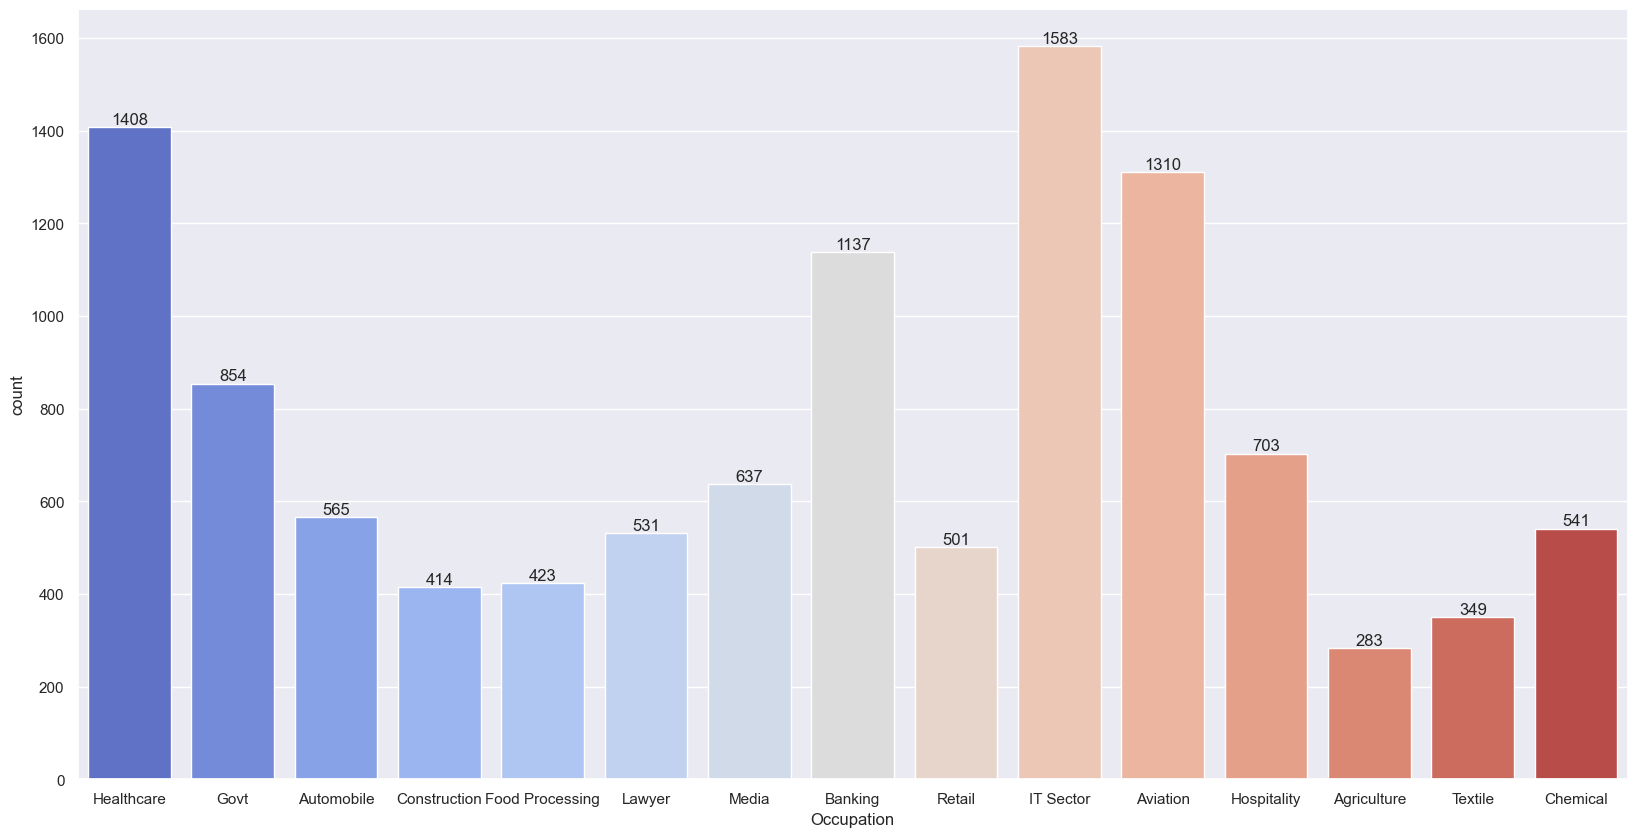

In [102]:
# count of occupation
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(data=df,x="Occupation",legend=False,hue='Occupation',palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

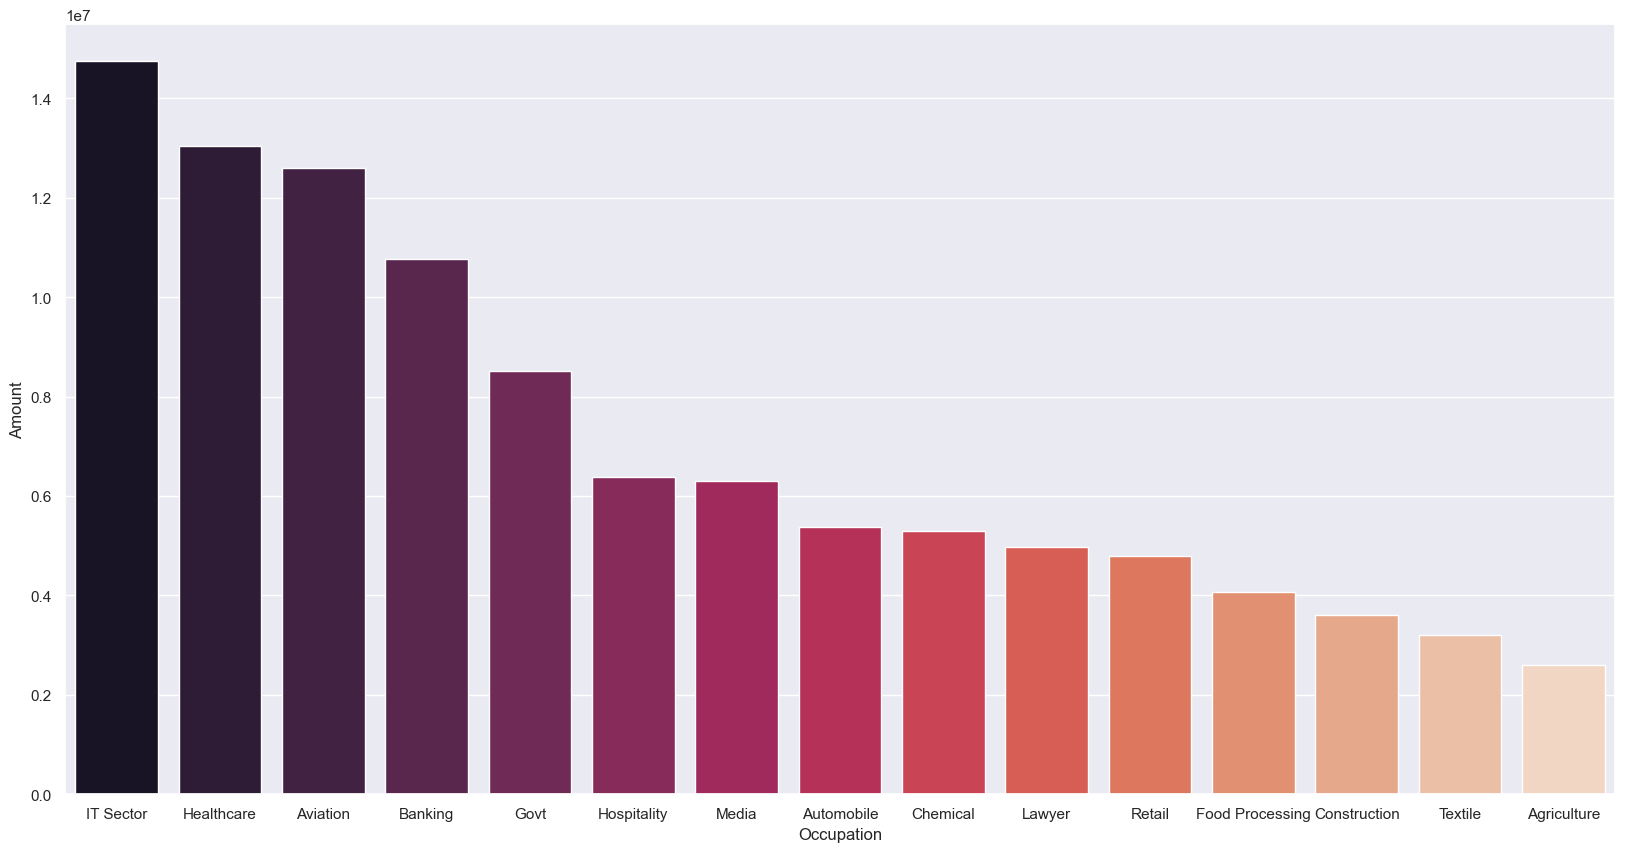

In [104]:
# which occupation spend more
sales_occup = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=sales_occup,x='Occupation',y='Amount',legend=False,hue='Occupation',palette='rocket')

## PRODUCT CATEGORY

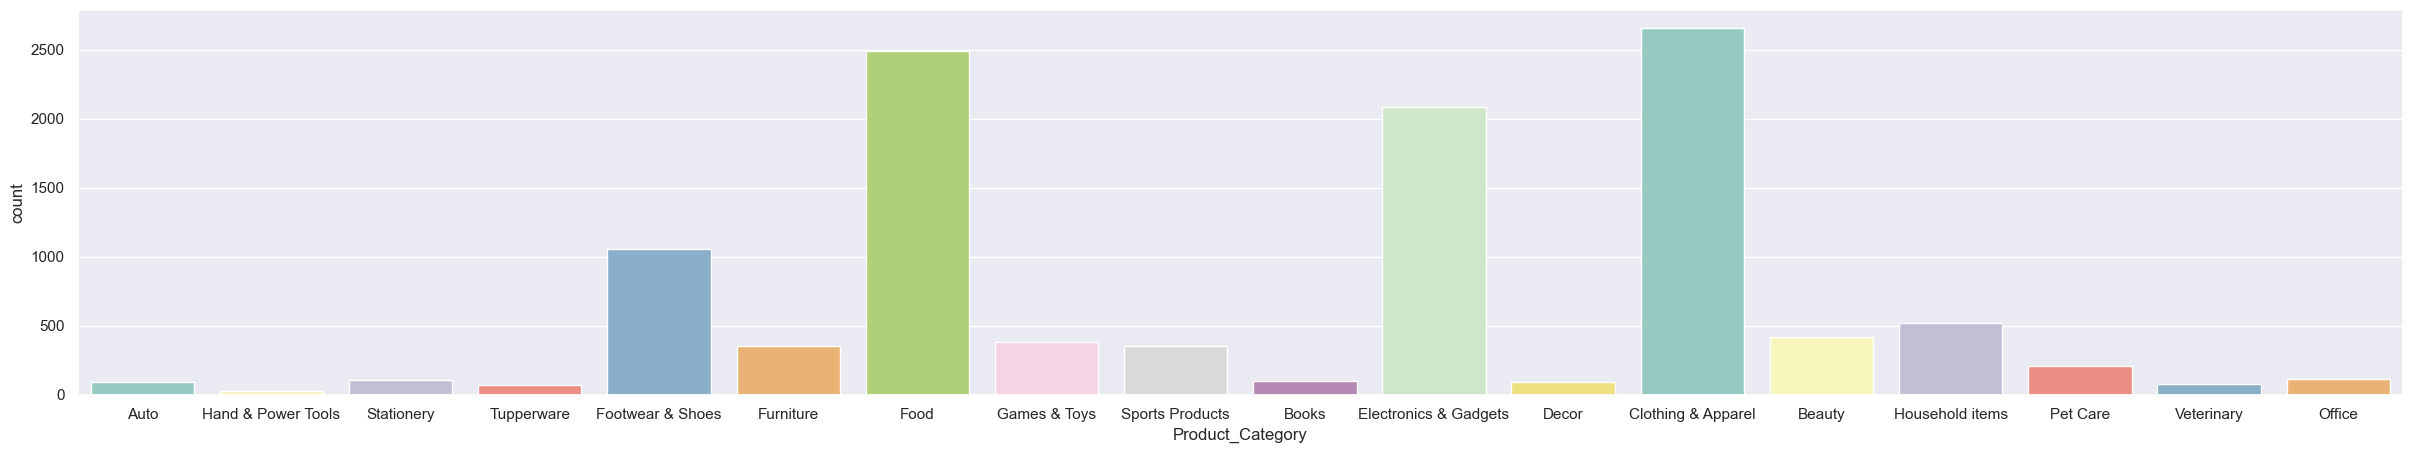

In [116]:
# number of product sales
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(data=df,x='Product_Category',legend=False,hue='Product_Category',palette='Set3')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

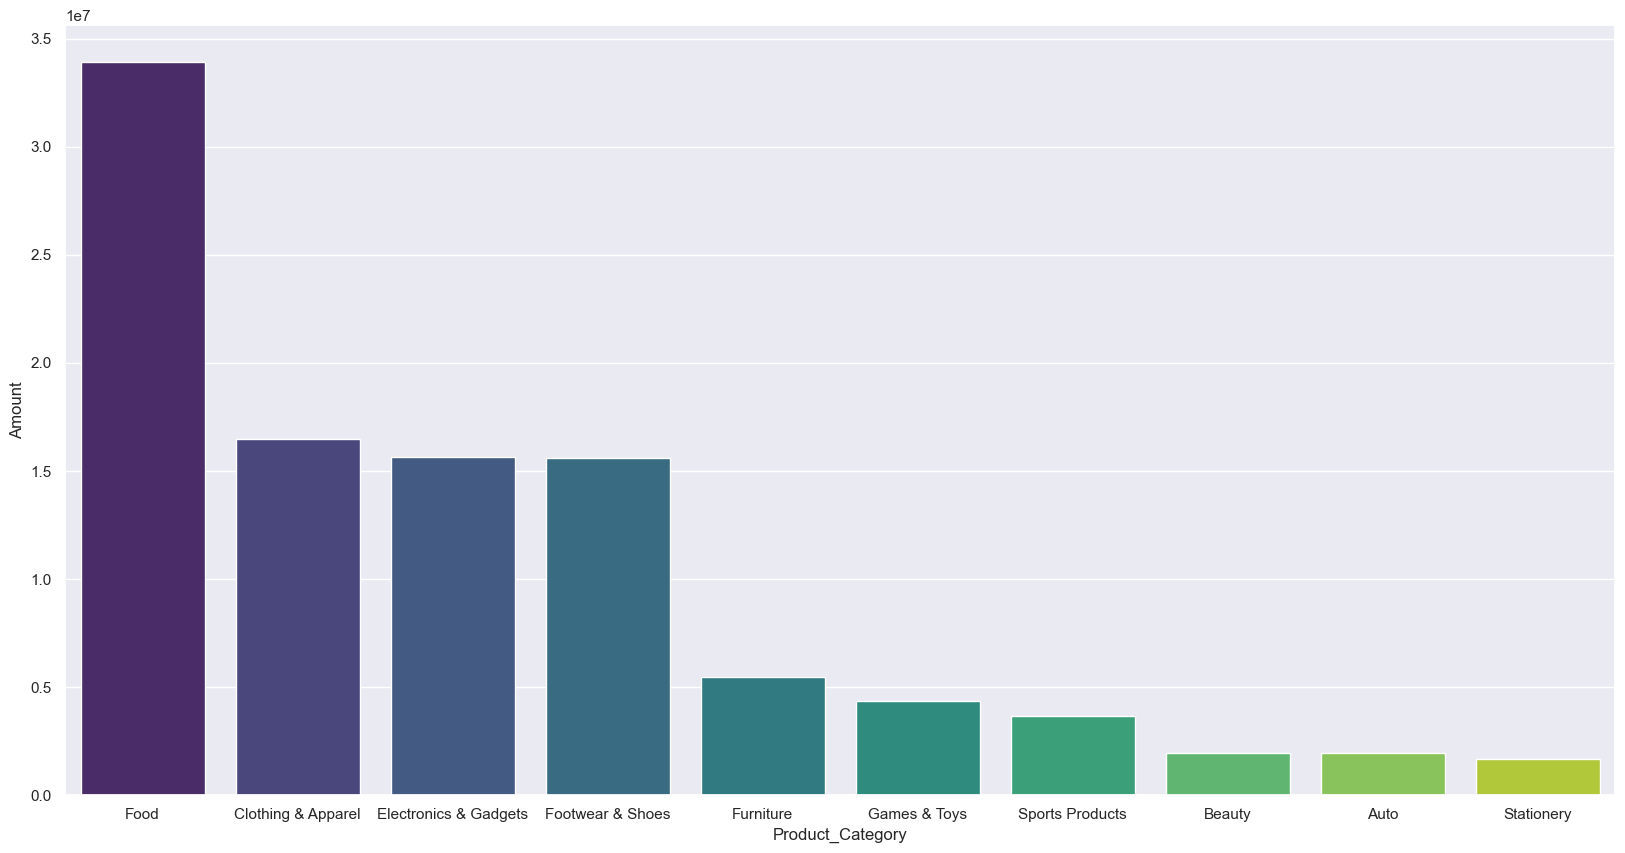

In [127]:
# top 10 saled category with names
sales_cat = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=sales_cat,x='Product_Category',y='Amount',legend=False,hue='Product_Category',palette='viridis')

<Axes: xlabel='Product_ID', ylabel='Orders'>

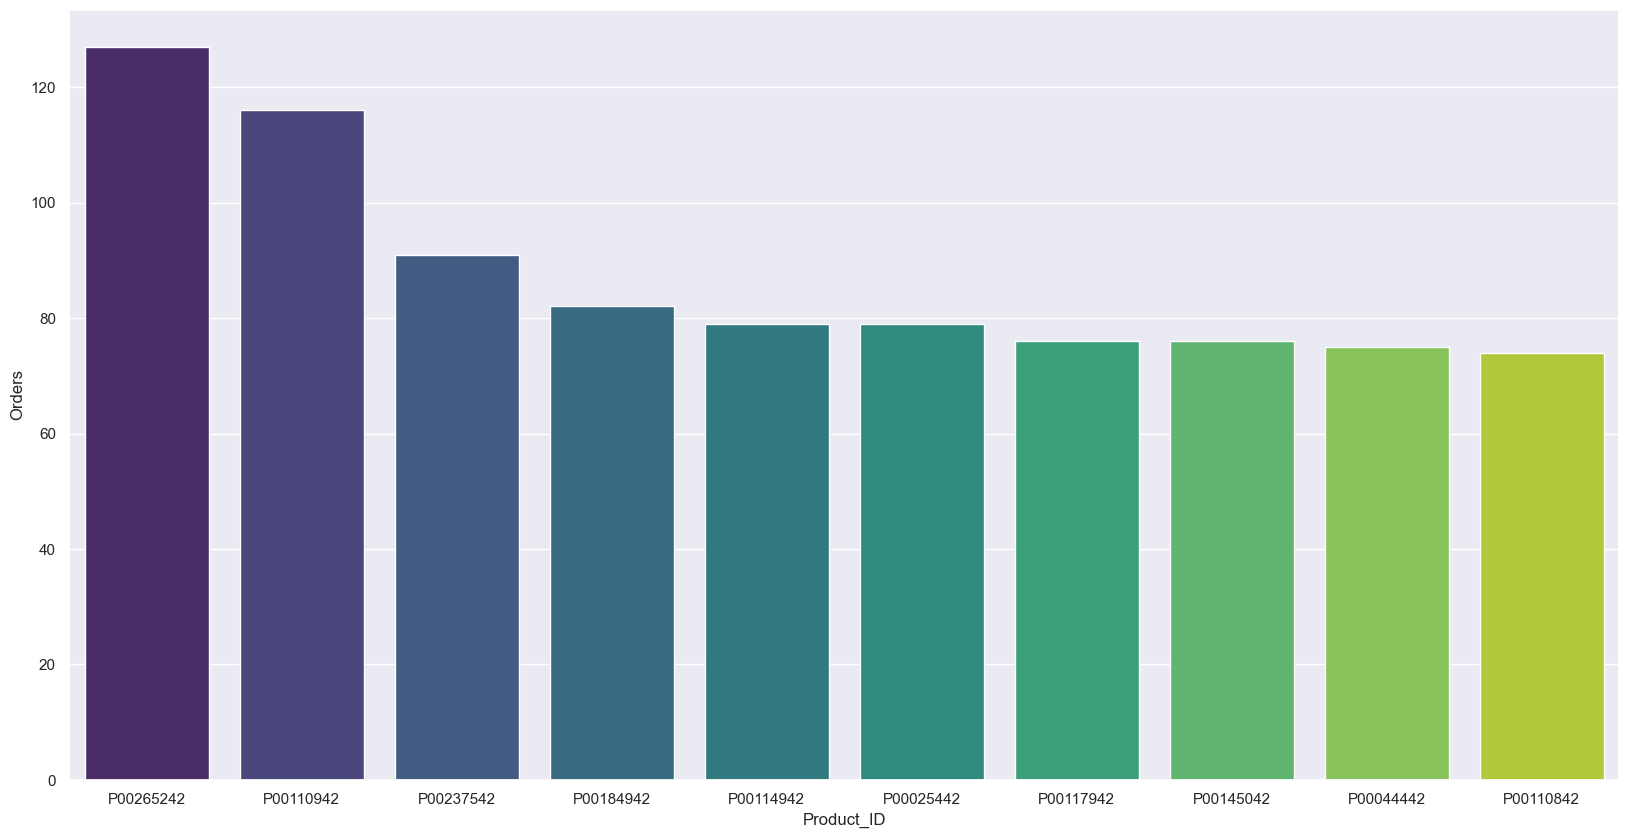

In [135]:
# # top 10 saled category with ID
sales_cat = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=sales_cat,x='Product_ID',y='Orders',legend=False,hue='Product_ID',palette='viridis')

<Axes: xlabel='Product_ID'>

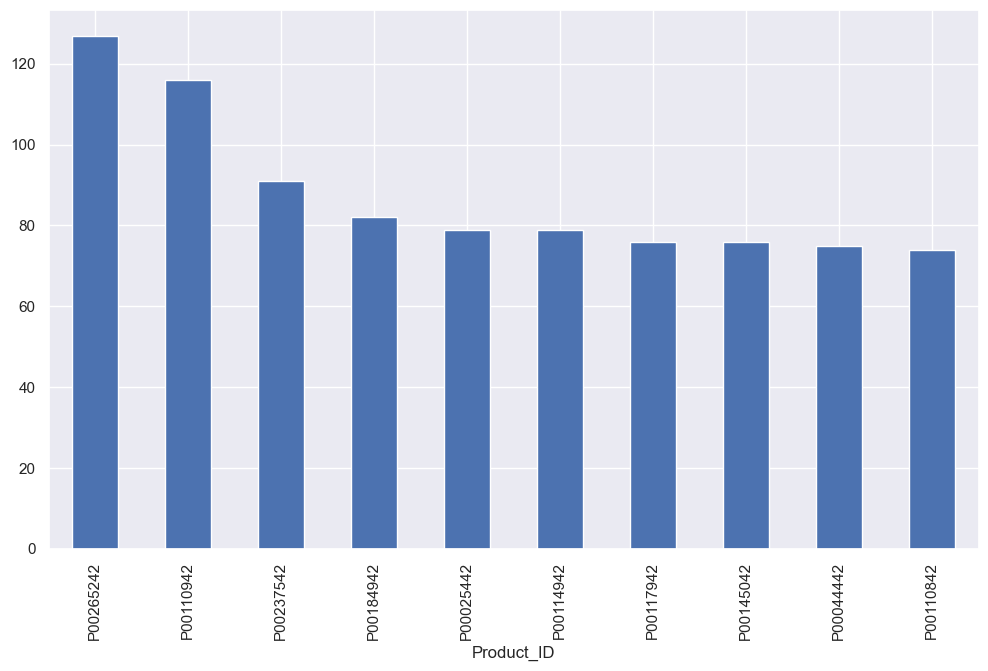

In [137]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')